In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading training and testing error data
train_errors_df=pd.read_hdf('train_errors.h5',header=0)
test_errors_df=pd.read_hdf('test_errors.h5',header=0)

In [3]:
# Initialize a dictionary to store MAE for each index in training data
mae_per_index = {}

# Get unique values of the first index level in multi-index for training data
unique_first_indices = train_errors_df.index.get_level_values(0).unique()

# Iterate over each unique first index in training data
for first_index in unique_first_indices:
    # Find all data points with that first index
    subset_indices = train_errors_df.index.get_level_values(0) == first_index
    subset = train_errors_df[subset_indices]


    # If subset is not empty, calculate MAE
    if len(subset) > 0:
        mae = mean_absolute_error(subset['y_train'], subset['y_train_pred'])
        mae_per_index[first_index] = mae

# Convert the mae_per_index dictionary to a DataFrame and save as CSV
mae_list = list(mae_per_index.items())
mae_df = pd.DataFrame(mae_list, columns=['Index', 'MAE'])

mae_df.to_csv('mae_training_station.csv', index=False)

# Sort the MAE list in descending order for training data
mae_list.sort(key=lambda x: x[1], reverse=True)

In [4]:
# Repeat the process for test data
mae_per_index2 = {}


unique_first_indices = test_errors_df.index.get_level_values(0).unique()


for first_index in unique_first_indices:
    subset_indices = test_errors_df.index.get_level_values(0) == first_index
    subset = test_errors_df[subset_indices]
    if len(subset) > 0:
        mae = mean_absolute_error(subset['y_test'], subset['y_test_pred'])
        mae_per_index2[first_index] = mae



mae_list2 = list(mae_per_index2.items())

mae_df2 = pd.DataFrame(mae_list2, columns=['Index', 'MAE'])

mae_df2.to_csv('mae_test_station.csv', index=False)

mae_list2.sort(key=lambda x: x[1], reverse=True)

In [5]:
mse_df = pd.read_csv('mse_test_station.csv')
mae_df = pd.read_csv('mae_test_station.csv')

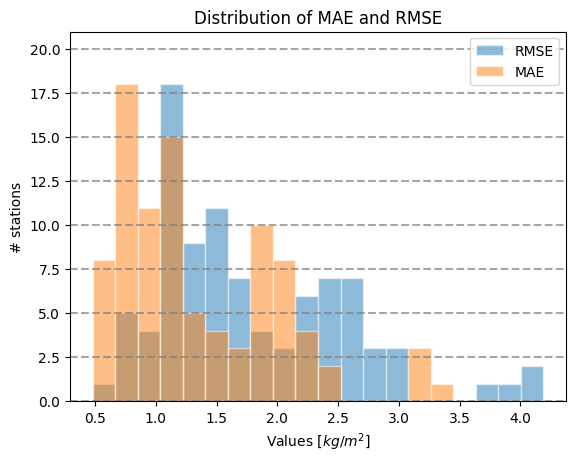

In [6]:
# Square root of MSE values
rmse_values = np.sqrt(mse_df['MSE'])
mae_values = mae_df['MAE']

# Calculate min and max values for histogram bins
min_value = min(rmse_values.min(), mae_values.min())
max_value = max(rmse_values.max(), mae_values.max())

# Create bins array
bins = np.linspace(min_value, max_value, num=21)  

# Plot histogram
plt.hist(mse_values, bins=bins, alpha=0.5, label='RMSE', edgecolor='white')
plt.hist(mae_values, bins=bins, alpha=0.5, label='MAE', edgecolor='white')

# Add legend, title, and labels
plt.legend(loc='upper right')
plt.title('Distribution of MAE and RMSE')
plt.xlabel('Values [$kg/m^2$]')
plt.ylabel('# stations')

# 获取当前坐标轴
ax = plt.gca()

# 获取y轴的主要刻度位置
ticks = ax.get_yticks()

# Draw horizontal lines at major y-ticks
for tick in ticks:
    plt.axhline(y=tick, color='gray', linestyle='--', alpha=0.7) 

# Show the plot
plt.show()